In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data=pd.read_table('CDNOW.txt',sep='\s+',header=None,names=['user-id','time','q','money'])
data['order-id']=np.arange(data.shape[0])
data['date'] = pd.to_datetime(data.time, format = '%Y%m%d')
#data['month']=data['time'].astype('datetime64[M]')
data=data[['order-id','user-id','date','q','money']]
data.head()

,order-id,user-id,date,q,money
0,0,1,1997-01-01,1,11.77
1,1,2,1997-01-12,1,12.00
2,2,2,1997-01-12,5,77.00
3,3,3,1997-01-02,2,20.76
4,4,3,1997-03-30,2,20.76


,order-id,user-id,date,q,money
0,0,1,1997-01-01,1,11.77
1,1,2,1997-01-12,1,12.00
2,2,2,1997-01-12,5,77.00
3,3,3,1997-01-02,2,20.76
4,4,3,1997-03-30,2,20.76
5,5,3,1997-04-02,2,19.54
6,6,3,1997-11-15,5,57.45
7,7,3,1997-11-25,4,20.96
8,8,3,1998-05-28,1,16.99
9,9,4,1997-01-01,2,29.33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
order-id    69659 non-null int32
user-id     69659 non-null int64
date        69659 non-null datetime64[ns]
q           69659 non-null int64
money       69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 2.4 MB


# 商品销售静态分析

In [5]:
# 各订单购买数量、金额分析
data.describe().drop(['order-id','user-id'],axis=1)

,q,money
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


In [31]:
data_c=data[~data['money'].isin([0])]   #删除文件中的取消订单、免费订单

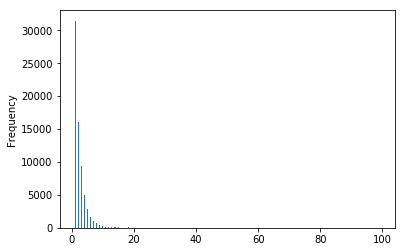

In [69]:
data['q'].plot.hist(bins=300)

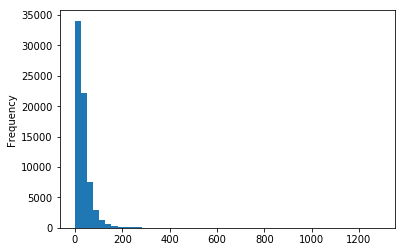

In [70]:
data['money'].plot.hist(bins=50)

In [71]:
# 购买数量为q的订单各有多少
data.groupby('q').count()['order-id']

q
1     31454
2     16070
3      9444
4      5015
5      2792
6      1627
7      1057
8       684
9       403
10      293
11      180
12      136
13      108
14       70
15       59
16       39
17       34
18       48
19       26
20       22
21       12
22       15
23        8
24        8
25        9
26        7
27        6
28        3
29        2
30        3
32        3
34        1
36        1
37        3
38        3
39        3
40        2
41        1
42        1
43        1
47        1
56        2
63        1
70        1
99        1
Name: order-id, dtype: int64

# 商品销售动态分析

In [6]:
# 订单数量、金额趋势分析
grouped1=data.groupby('date')
q=grouped1['q']
f1=q.agg(['count','max','min'])
f1.reset_index()

,date,count,max,min
0,1997-01-01,212,27,1
1,1997-01-02,247,14,1
2,1997-01-03,236,10,1
3,1997-01-04,178,15,1
4,1997-01-05,256,12,1
5,1997-01-06,275,16,1
6,1997-01-07,223,40,1
7,1997-01-08,239,9,1
8,1997-01-09,241,20,1
9,1997-01-10,239,16,1


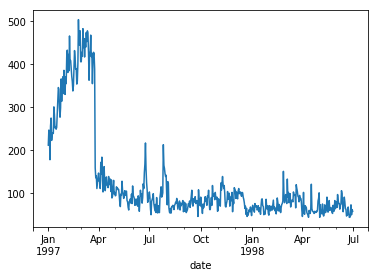

In [73]:
import seaborn as sns
f1['count'].plot()
# 一到三月订单数较多

In [74]:
m=grouped1['money']
f2=m.agg(['count','max','min'])
f2.reset_index()

,date,count,max,min
0,1997-01-01,212,363.60,6.79
1,1997-01-02,247,199.15,0.00
2,1997-01-03,236,143.38,0.00
3,1997-01-04,178,216.94,0.00
4,1997-01-05,256,283.97,0.00
5,1997-01-06,275,283.97,0.00
6,1997-01-07,223,548.48,0.00
7,1997-01-08,239,136.28,0.00
8,1997-01-09,241,268.32,0.00
9,1997-01-10,239,242.28,3.99


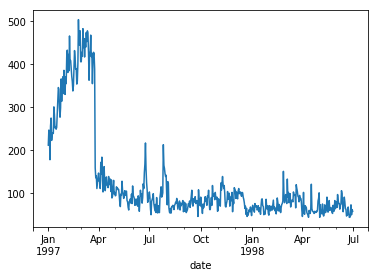

In [75]:
f2['count'].plot()
# 可看出一月到三月的订单的金额较多

In [93]:
d1=data[(data['date']>'1997-1-1')&(data['date']<'1997-3-30')]
d1.groupby('date').count()

,order-id,user-id,q,money
date,,,,
1997-01-02,247,247,247,247
1997-01-03,236,236,236,236
1997-01-04,178,178,178,178
1997-01-05,256,256,256,256
1997-01-06,275,275,275,275
1997-01-07,223,223,223,223
1997-01-08,239,239,239,239
1997-01-09,241,241,241,241
1997-01-10,239,239,239,239


# 用户消费行为动态分析

In [9]:
# 各用户购买数量分析
## 累积购买数量分析
data.groupby('user-id').count()['q']

user-id
1         1
2         2
3         6
4         4
5        11
6         1
7         3
8         8
9         3
10        1
11        4
12        1
13        1
14        1
15        1
16        4
17        1
18        1
19        2
20        2
21        2
22        1
23        1
24        2
25        8
26        2
27        2
28        3
29       12
30        2
         ..
23541     2
23542     1
23543     1
23544     3
23545     1
23546     1
23547     2
23548     1
23549     1
23550     1
23551     6
23552     2
23553     2
23554     2
23555     5
23556     7
23557     1
23558     4
23559     3
23560     1
23561     3
23562     1
23563     2
23564     3
23565     1
23566     1
23567     1
23568     3
23569     1
23570     2
Name: q, Length: 23570, dtype: int64

In [13]:
## 各用户数量累积贡献分析
data.groupby('user-id').count()['q']/data['q'].sum()

user-id
1        0.000006
2        0.000012
3        0.000036
4        0.000024
5        0.000066
6        0.000006
7        0.000018
8        0.000048
9        0.000018
10       0.000006
11       0.000024
12       0.000006
13       0.000006
14       0.000006
15       0.000006
16       0.000024
17       0.000006
18       0.000006
19       0.000012
20       0.000012
21       0.000012
22       0.000006
23       0.000006
24       0.000012
25       0.000048
26       0.000012
27       0.000012
28       0.000018
29       0.000071
30       0.000012
           ...   
23541    0.000012
23542    0.000006
23543    0.000006
23544    0.000018
23545    0.000006
23546    0.000006
23547    0.000012
23548    0.000006
23549    0.000006
23550    0.000006
23551    0.000036
23552    0.000012
23553    0.000012
23554    0.000012
23555    0.000030
23556    0.000042
23557    0.000006
23558    0.000024
23559    0.000018
23560    0.000006
23561    0.000018
23562    0.000006
23563    0.000012
23564    0.000018
23

In [15]:
## 各用户最大单笔购买数量分析
data.groupby('user-id').max()['q']

user-id
1         1
2         5
3         5
4         2
5         4
6         1
7         9
8         7
9         2
10        3
11        1
12        4
13        4
14        2
15        4
16        4
17        5
18        1
19       10
20       27
21        3
22        1
23        2
24        3
25        3
26        3
27        6
28        3
29        4
30        1
         ..
23541     1
23542     5
23543     2
23544     5
23545     1
23546     1
23547     1
23548     2
23549     2
23550     2
23551     4
23552     2
23553     4
23554     2
23555     4
23556     3
23557     1
23558     4
23559     3
23560     1
23561     3
23562     2
23563     2
23564     3
23565     1
23566     2
23567     1
23568     4
23569     2
23570     3
Name: q, Length: 23570, dtype: int64

In [18]:
# 各用户购买金额分析
## 各用户累积购买金额分析
data.groupby('user-id').sum()['money']

user-id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: money, Len

In [19]:
## 各用户购买金额累积贡献分析
data.groupby('user-id').sum()['money']/data['money'].sum()

user-id
1        0.000005
2        0.000036
3        0.000063
4        0.000040
5        0.000154
6        0.000008
7        0.000106
8        0.000079
9        0.000038
10       0.000016
11       0.000023
12       0.000023
13       0.000029
14       0.000012
15       0.000021
16       0.000032
17       0.000029
18       0.000006
19       0.000070
20       0.000261
21       0.000030
22       0.000006
23       0.000010
24       0.000023
25       0.000055
26       0.000041
27       0.000054
28       0.000036
29       0.000174
30       0.000011
           ...   
23541    0.000023
23542    0.000031
23543    0.000020
23544    0.000054
23545    0.000010
23546    0.000006
23547    0.000009
23548    0.000009
23549    0.000011
23550    0.000010
23551    0.000106
23552    0.000020
23553    0.000039
23554    0.000015
23555    0.000076
23556    0.000081
23557    0.000006
23558    0.000058
23559    0.000045
23560    0.000007
23561    0.000033
23562    0.000012
23563    0.000023
23564    0.000028
23

In [20]:
## 各用户最大单笔消费金额分析
data.groupby('user-id').max()['money']

user-id
1         11.77
2         77.00
3         57.45
4         29.73
5         46.46
6         20.99
7        138.50
8         50.43
9         41.98
10        39.31
11        19.30
12        57.06
13        72.94
14        29.92
15        52.87
16        31.60
17        73.22
18        14.96
19       163.35
20       363.60
21        63.34
22        14.37
23        24.74
24        47.28
25        24.98
26        59.97
27        83.41
28        39.51
29        67.31
30        14.37
          ...  
23541     46.37
23542     77.43
23543     50.76
23544     48.68
23545     24.99
23546     13.97
23547     11.77
23548     23.54
23549     27.13
23550     25.28
23551    102.36
23552     26.93
23553     49.30
23554     24.60
23555     49.96
23556     45.74
23557     14.37
23558     48.22
23559     52.80
23560     18.36
23561     37.05
23562     29.33
23563     47.98
23564     46.47
23565     11.77
23566     36.00
23567     20.97
23568     83.74
23569     25.74
23570     51.12
Name: money, Len

In [21]:
data[data['user-id']==2]

,order-id,user-id,date,q,money
1,1,2,1997-01-12,1,12.0
2,2,2,1997-01-12,5,77.0


In [22]:
# 各用户购买次数分析
data.groupby('user-id').count()

,order-id,date,q,money
user-id,,,,
1,1,1,1,1
2,2,2,2,2
3,6,6,6,6
4,4,4,4,4
5,11,11,11,11
6,1,1,1,1
7,3,3,3,3
8,8,8,8,8
9,3,3,3,3


# 用户消费行为动态分析

In [24]:
# 各用户第一次购买时间
grouped2=data.groupby('user-id')
grouped2['date'].min()

user-id
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
6       1997-01-01
7       1997-01-01
8       1997-01-01
9       1997-01-01
10      1997-01-21
11      1997-01-01
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-01-01
17      1997-01-01
18      1997-01-04
19      1997-01-01
20      1997-01-01
21      1997-01-01
22      1997-01-01
23      1997-01-01
24      1997-01-01
25      1997-01-01
26      1997-01-01
27      1997-01-07
28      1997-01-01
29      1997-01-01
30      1997-01-01
           ...    
23541   1997-03-25
23542   1997-03-25
23543   1997-03-25
23544   1997-03-25
23545   1997-03-25
23546   1997-03-25
23547   1997-03-25
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-03-25
23552   1997-03-25
23553   1997-03-25
23554   1997-03-25
23555   1997-03-25
23556   1997-03-25
23557   1997-03-25
23558   1997-03-25
23559   1997-03-25
23560   1997-03-25
23561   1997-03-25
2356

In [25]:
# 各用户最后一次购买时间
grouped2['date'].max()

user-id
1       1997-01-01
2       1997-01-12
3       1998-05-28
4       1997-12-12
5       1998-01-03
6       1997-01-01
7       1998-03-22
8       1998-03-29
9       1998-06-08
10      1997-01-21
11      1998-02-20
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-09-10
17      1997-01-01
18      1997-01-04
19      1997-06-10
20      1997-01-18
21      1997-01-13
22      1997-01-01
23      1997-01-01
24      1998-01-20
25      1998-06-08
26      1997-01-26
27      1997-01-12
28      1997-03-08
29      1998-04-26
30      1997-02-14
           ...    
23541   1997-04-02
23542   1997-03-25
23543   1997-03-25
23544   1998-01-24
23545   1997-03-25
23546   1997-03-25
23547   1997-04-07
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-09-11
23552   1997-04-03
23553   1997-03-28
23554   1998-02-01
23555   1998-06-10
23556   1998-06-07
23557   1997-03-25
23558   1998-02-25
23559   1997-06-27
23560   1997-03-25
23561   1998-05-29
2356

In [41]:
# 各用户最后一次消费与当前时间的间隔
import datetime
datetime.datetime.now()-data_c.groupby('user-id').max()['date']

user-id
1       8183 days 11:04:45.270341
2       8172 days 11:04:45.270341
3       7671 days 11:04:45.270341
4       7838 days 11:04:45.270341
5       7816 days 11:04:45.270341
6       8183 days 11:04:45.270341
7       7738 days 11:04:45.270341
8       7731 days 11:04:45.270341
9       7660 days 11:04:45.270341
10      8163 days 11:04:45.270341
11      7768 days 11:04:45.270341
12      8183 days 11:04:45.270341
13      8183 days 11:04:45.270341
14      8183 days 11:04:45.270341
15      8183 days 11:04:45.270341
16      7931 days 11:04:45.270341
17      8183 days 11:04:45.270341
18      8180 days 11:04:45.270341
19      8023 days 11:04:45.270341
20      8166 days 11:04:45.270341
21      8171 days 11:04:45.270341
22      8183 days 11:04:45.270341
23      8183 days 11:04:45.270341
24      7799 days 11:04:45.270341
25      7660 days 11:04:45.270341
26      8158 days 11:04:45.270341
27      8172 days 11:04:45.270341
28      8117 days 11:04:45.270341
29      7703 days 11:04:45.270341
30    

In [42]:
# 各用户生命周期分析
data_c.groupby('user-id').max()['date']-data_c.groupby('user-id').min()['date']+datetime.timedelta(days=1)

user-id
1         1 days
2         1 days
3       512 days
4       346 days
5       368 days
6         1 days
7       446 days
8       453 days
9       524 days
10        1 days
11      416 days
12        1 days
13        1 days
14        1 days
15        1 days
16      253 days
17        1 days
18        1 days
19      161 days
20       18 days
21       13 days
22        1 days
23        1 days
24      385 days
25      524 days
26       26 days
27        6 days
28       67 days
29      481 days
30       45 days
          ...   
23541     9 days
23542     1 days
23543     1 days
23544   306 days
23545     1 days
23546     1 days
23547    14 days
23548     1 days
23549     1 days
23550     1 days
23551   171 days
23552    10 days
23553     4 days
23554   314 days
23555   443 days
23556   440 days
23557     1 days
23558   338 days
23559    95 days
23560     1 days
23561   431 days
23562     1 days
23563   194 days
23564   251 days
23565     1 days
23566     1 days
23567     1 days
23568 

In [90]:
# 各用户首次回购周期
d1=data.groupby('user-id').min().reset_index()
d1['max']=True
d2=data.merge(d1,'outer')
d2[~d2['max'].isin([True])].groupby('user-id').max()['date']-data_c.groupby('user-id').min()['date']

user-id
1            NaT
2         0 days
3       511 days
4       345 days
5       367 days
6            NaT
7       445 days
8       452 days
9       523 days
10           NaT
11      415 days
12           NaT
13           NaT
14           NaT
15           NaT
16      252 days
17           NaT
18           NaT
19      160 days
20       17 days
21       12 days
22           NaT
23           NaT
24      384 days
25      523 days
26       25 days
27        5 days
28       66 days
29      480 days
30       44 days
          ...   
23541     8 days
23542        NaT
23543        NaT
23544   305 days
23545        NaT
23546        NaT
23547    13 days
23548        NaT
23549        NaT
23550        NaT
23551   170 days
23552     9 days
23553     3 days
23554   313 days
23555   442 days
23556   439 days
23557        NaT
23558   337 days
23559    94 days
23560        NaT
23561   430 days
23562        NaT
23563   193 days
23564   250 days
23565        NaT
23566        NaT
23567        NaT
23568 